In [125]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [126]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [127]:
import pandas as pd

In [128]:
import numpy as np

In [129]:
df=pd.read_csv('spam.csv')

In [130]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
184,ham,Going on nothing great.bye,NaN,NaN,NaN
3913,ham,Today is ACCEPT DAY..U Accept me as? Brother S...,NaN,NaN,NaN
85,ham,"I call you later, don't have network. If urgnt...",NaN,NaN,NaN
3371,ham,And now electricity just went out fml.,NaN,NaN,NaN
4096,ham,i am going to bed now prin,NaN,NaN,NaN


In [131]:
df.shape

(5572, 5)

In [132]:
#1. data cleaning
# 2. exploratory data analysis
# 3.Text pre processing
# 4. model building
# 5. Evaluation
# 6. Improvements
# 7. website
# 8. Deploy


## 1.Data cleaning


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [134]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [135]:
df.sample(5)

,v1,v2
380,ham,I guess that's why you re worried. You must kn...
680,ham,What is this 'hex' place you talk of? Explain!
1167,ham,Lol now I'm after that hot air balloon!
1565,ham,"The &lt;#&gt; g that i saw a few days ago, th..."
4177,ham,Two teams waiting for some players


In [136]:
#renaming the columns

In [137]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [138]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [139]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [140]:
df['target']=encoder.fit_transform(df['target'])

In [141]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
# missing values

In [143]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [144]:
#check for duplicate values

In [145]:
df.duplicated().sum()

403

In [146]:
df=df.drop_duplicates(keep='first')

In [147]:
df.duplicated().sum()

0

In [148]:
df.shape

(5169, 2)

2.EDA

In [149]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1e2aa565930>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

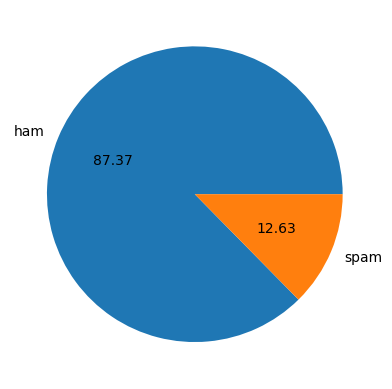

In [151]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [152]:
# data is imbalanced

In [153]:
import nltk

In [154]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [155]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swethareddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [156]:
df['num_characters']=df['text'].apply(len)

In [157]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [158]:
#num of words

In [159]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [160]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [161]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [162]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [163]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [164]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [165]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [166]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

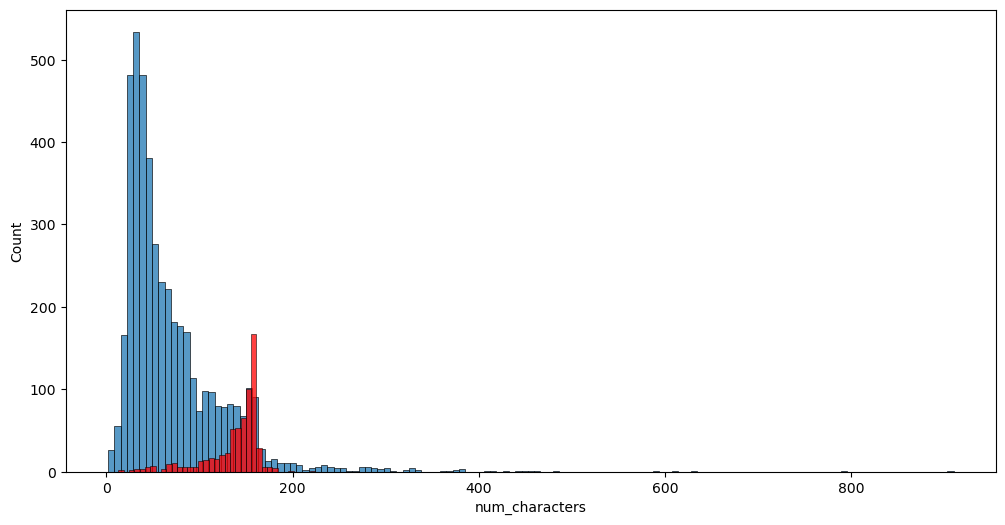

In [167]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

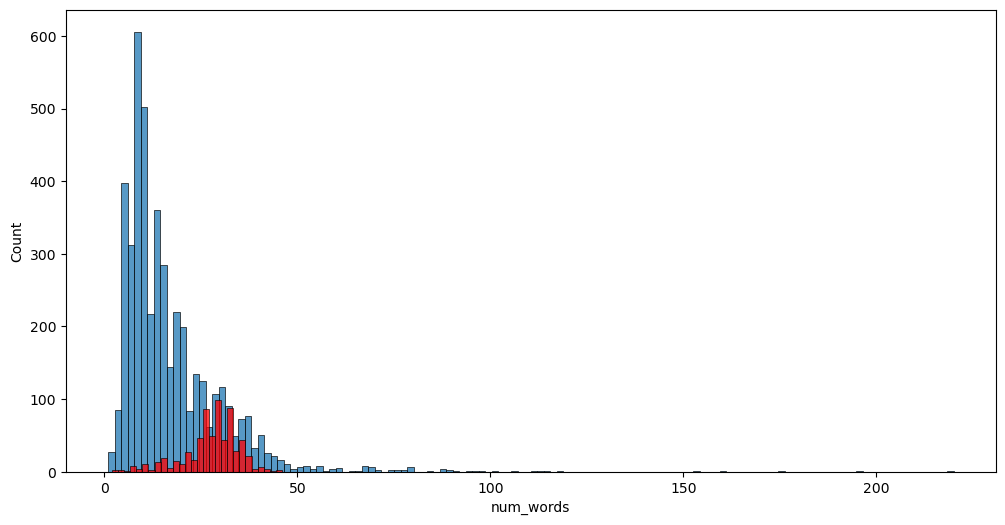

In [168]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

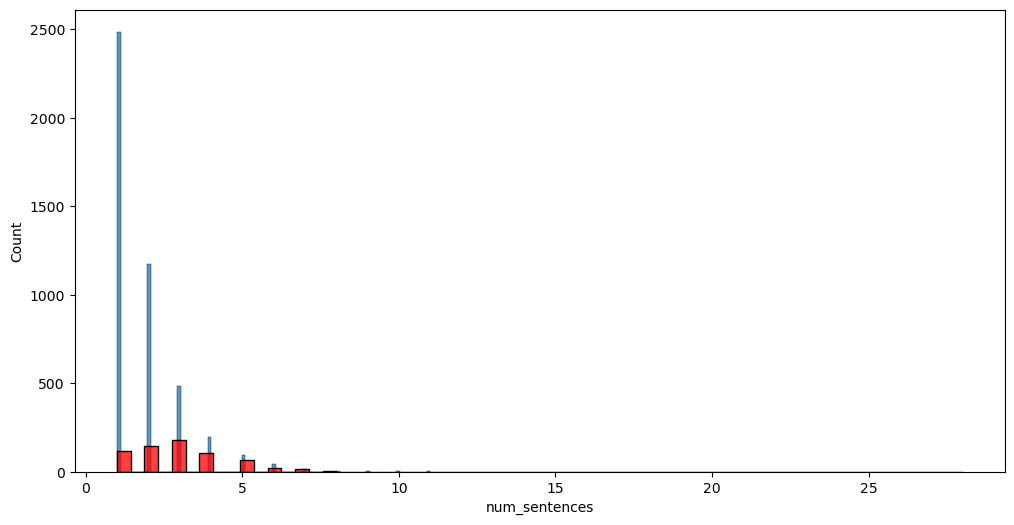

In [169]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

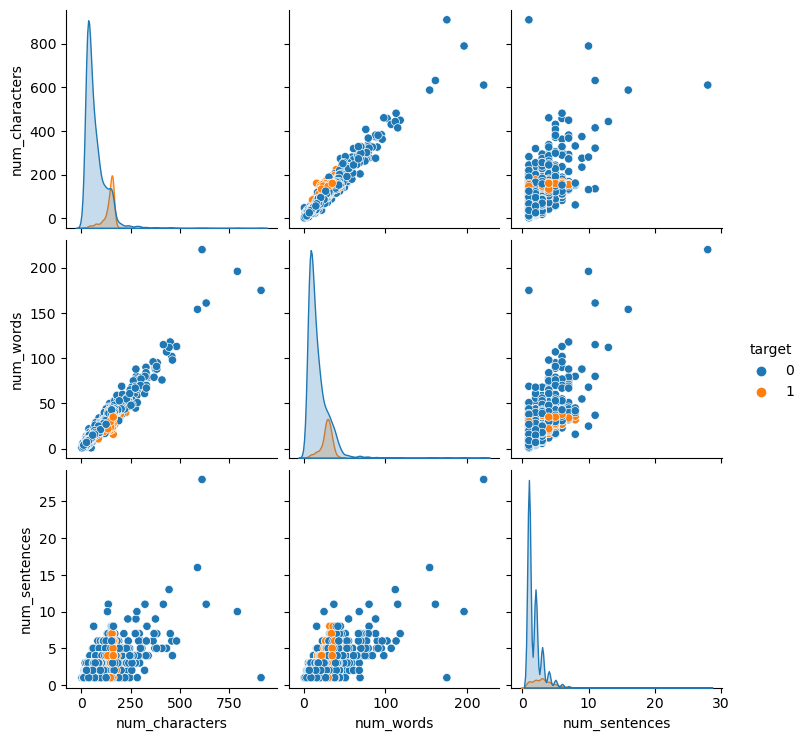

In [170]:
sns.pairplot(df,hue='target')

C:\Users\swethareddy\AppData\Local\Temp\ipykernel_19596\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

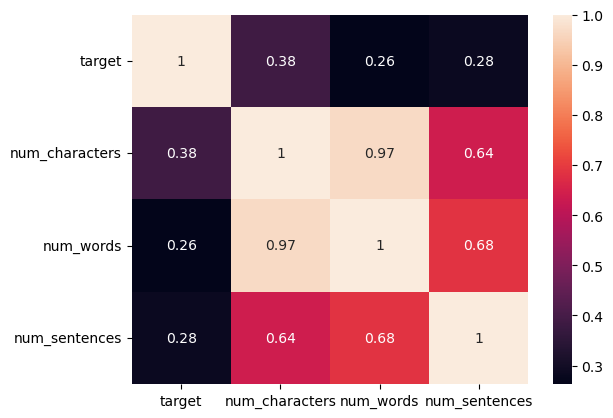

In [171]:
sns.heatmap(df.corr(),annot=True)

# data preprocessing

In [172]:
# 1. lower case
#2. tokenization
#3. removing special characters
#4. removing stop words and punctuation
#5.stemming

In [173]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
     
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
      
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [174]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swethareddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [176]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [177]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [178]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazy available bugis n great world la e buffet cine got amore wat go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat'

In [179]:
df['text'].apply(transform_text)

0       go jurong point crazy available bugis n great ...
1           ok lar joking wif u oni ok lar joke wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3       u dun say early hor u c already say u dun say ...
4       nah think goes usf lives around though nah i d...
                              ...                        
5567    2nd time tried 2 contact u pound prize 2 claim...
5568    b going esplanade fr home will b go to esplana...
5569    pity mood suggestions piti wa in mood for that...
5570    guy bitching acted like interested buying some...
5571               rofl true name rofl it true to it name
Name: text, Length: 5169, dtype: object

In [180]:
df['transformed_text']=df['text'].apply(transform_text)

In [181]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah i d...


In [182]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [183]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [184]:
pip show wordcloud

Name: wordcloud
Version: 1.8.2.2
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: Andreas Mueller
Author-email: t3kcit+wordcloud@gmail.com
License: MIT
Location: c:\users\swethareddy\appdata\roaming\python\python310\site-packages
Requires: matplotlib, numpy, pillow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [185]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

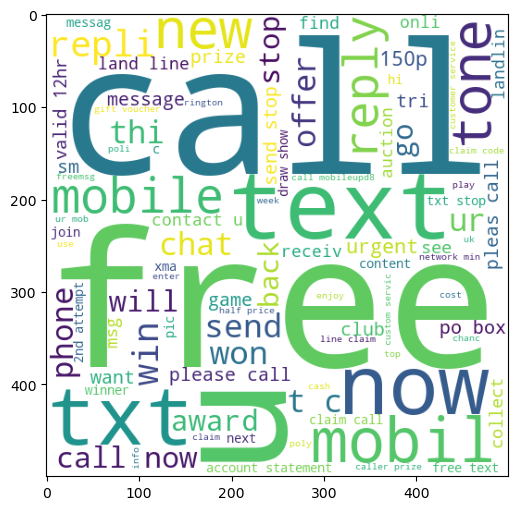

In [186]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [187]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

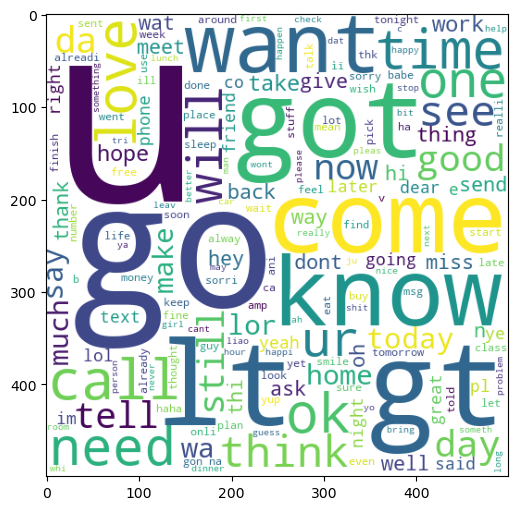

In [188]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [189]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah i d...


In [190]:
df['target']==1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: target, Length: 5169, dtype: bool

In [191]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
    

In [192]:
len(spam_corpus)

24414

In [193]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [194]:
len(ham_corpus)

98193

## MODEL BUILDING

In [195]:
# Naive bayes

In [196]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah i d...


In [197]:
#Text Vectorization
#using bag of words

In [198]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [199]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [200]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [201]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [202]:
X.shape


(5169, 10067)

In [203]:
y=df['target'].values

In [204]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [207]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [208]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [209]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8984526112185687
[[817  79]
 [ 26 112]]
0.5863874345549738


In [210]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9690522243713733
[[875  21]
 [ 11 127]]
0.8581081081081081


In [211]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9680851063829787
[[890   6]
 [ 27 111]]
0.9487179487179487


In [212]:
#tfvectorizer

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [214]:
X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [215]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [216]:
X.shape


(5169, 3000)

In [217]:
y=df['target'].values

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [220]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [221]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[793 103]
 [ 21 117]]
0.5318181818181819


In [222]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [223]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[892   4]
 [ 15 123]]
0.968503937007874


In [224]:
# tfidf->bnb

## other ml algorithms

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [226]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [227]:
clfs={
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt
}

In [228]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [229]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9816247582205029, 0.983739837398374)

In [230]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9816247582205029
Precision -  0.983739837398374
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8173913043478261
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9711538461538461
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9734513274336283
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.90625
For  BgC
Accuracy -  0.965183752417795
Precision -  0.8984375
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.9574468085106383
Precision -  0.9433962264150944


In [231]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [232]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.976789,1.000000
0,SVC,0.981625,0.983740
8,ETC,0.978723,0.983333
5,RF,0.970019,0.973451
4,LR,0.961315,0.971154
9,GBDT,0.957447,0.943396
6,AdaBoost,0.967118,0.906250
7,BgC,0.965184,0.898438
3,DT,0.937137,0.817391


In [233]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [234]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.976789
2,SVC,Accuracy,0.981625
3,ETC,Accuracy,0.978723
4,RF,Accuracy,0.970019
5,LR,Accuracy,0.961315
6,GBDT,Accuracy,0.957447
7,AdaBoost,Accuracy,0.967118
8,BgC,Accuracy,0.965184
9,DT,Accuracy,0.937137


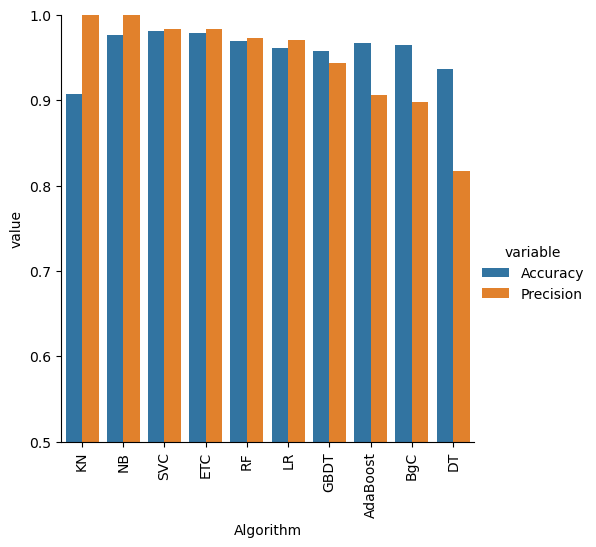

In [235]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [236]:
# model improvement
#1. change the max_features parameter of TfIdf

In [237]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [238]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [239]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [240]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [241]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
2,SVC,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
3,ETC,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333
4,RF,0.970019,0.973451,0.970019,0.973451,0.970019,0.973451
5,LR,0.961315,0.971154,0.961315,0.971154,0.961315,0.971154
6,GBDT,0.957447,0.943396,0.957447,0.943396,0.957447,0.943396
7,AdaBoost,0.967118,0.906250,0.967118,0.906250,0.967118,0.906250
8,BgC,0.965184,0.898438,0.965184,0.898438,0.965184,0.898438
9,DT,0.937137,0.817391,0.937137,0.817391,0.937137,0.817391


In [242]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [243]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
2,SVC,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
3,ETC,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333
4,RF,0.970019,0.973451,0.970019,0.973451,0.970019,0.973451,0.970019,0.973451
5,LR,0.961315,0.971154,0.961315,0.971154,0.961315,0.971154,0.961315,0.971154
6,GBDT,0.957447,0.943396,0.957447,0.943396,0.957447,0.943396,0.957447,0.943396
7,AdaBoost,0.967118,0.906250,0.967118,0.906250,0.967118,0.906250,0.967118,0.906250
8,BgC,0.965184,0.898438,0.965184,0.898438,0.965184,0.898438,0.965184,0.898438
9,DT,0.937137,0.817391,0.937137,0.817391,0.937137,0.817391,0.937137,0.817391


In [244]:
#voting classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [245]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('etc',etc)],voting='soft')

In [246]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [247]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [248]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.991869918699187


In [249]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))